In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
import os

In [2]:
classes = os.listdir('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test')
num_class=len(classes)
num_class

10

In [3]:
 img=ImageDataGenerator(rescale=1./255)
#     ,rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")
# from tensorflow.keras.applications.resnet50 import preprocess_input
# img = ImageDataGenerator(preprocessing_function=preprocess_input)
SEED = 42
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224
EPOCHS = 25
INIT_LR = 1e-3

In [4]:
train_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/train',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       subset = 'training',
                                       batch_size=BATCH_SIZE,
                                       )

Found 7280 images belonging to 10 classes.


In [5]:
val_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/val',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       
                                       batch_size=BATCH_SIZE,
                                       )

Found 1036 images belonging to 10 classes.


In [6]:
test_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test',
                                       target_size=(640,480),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 2091 images belonging to 10 classes.


In [7]:
xcep=tf.keras.applications.InceptionResNetV2(input_shape=(640,480,3),weights='imagenet', include_top=False)
for i in xcep.layers:
    i.trainable = False

219055592/219055592 [==============================] - 7s 0us/step


In [8]:
model = tf.keras.models.Sequential([
    xcep,
    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 18, 13, 1536)     54336736  
 onal)                                                           
                                                                 
 conv2d_203 (Conv2D)         (None, 18, 13, 128)       1769600   
                                                                 
 activation_203 (Activation)  (None, 18, 13, 128)      0         
                                                                 
 batch_normalization_203 (Ba  (None, 18, 13, 128)      512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 6, 128)        0         
 2D)                                                             
                                                        

In [13]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
callback2 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3, restore_best_weights = True)

In [14]:
history=model.fit(train_ds,validation_data=val_ds,epochs=40,callbacks=[callback2])

Epoch 1/40


2023-05-02 16:47:03.750220: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


114/114 [==============================] - 190s 2s/step - loss: 1.5810 - accuracy: 0.5011 - val_loss: 1.2457 - val_accuracy: 0.5782
Epoch 2/40
114/114 [==============================] - 159s 1s/step - loss: 0.7760 - accuracy: 0.7551 - val_loss: 0.8550 - val_accuracy: 0.7346
Epoch 3/40
114/114 [==============================] - 158s 1s/step - loss: 0.5010 - accuracy: 0.8449 - val_loss: 0.6401 - val_accuracy: 0.8127
Epoch 4/40
114/114 [==============================] - 158s 1s/step - loss: 0.3387 - accuracy: 0.9025 - val_loss: 0.6055 - val_accuracy: 0.8214
Epoch 5/40
114/114 [==============================] - 158s 1s/step - loss: 0.2441 - accuracy: 0.9350 - val_loss: 0.5228 - val_accuracy: 0.8552
Epoch 6/40
114/114 [==============================] - 159s 1s/step - loss: 0.1675 - accuracy: 0.9637 - val_loss: 0.4806 - val_accuracy: 0.8533
Epoch 7/40
114/114 [==============================] - 159s 1s/step - loss: 0.1270 - accuracy: 0.9768 - val_loss: 0.4649 - val_accuracy: 0.8678
Epoch 8/40

In [15]:
model.evaluate(test_ds)

33/33 [==============================] - 47s 1s/step - loss: 0.3997 - accuracy: 0.8881


[0.39971473813056946, 0.8880918025970459]

In [17]:
model.save('InceptionResNetv21.h5')

metrics of InceptionResnetV2


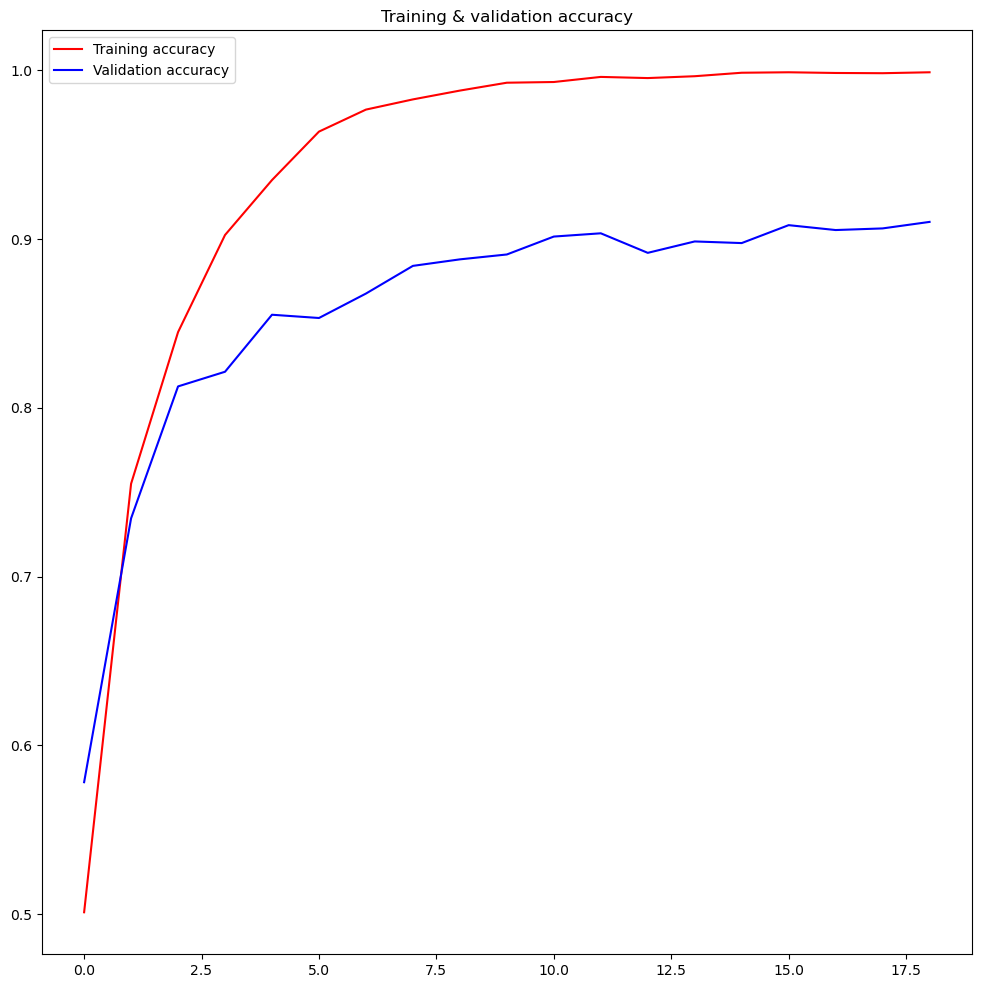

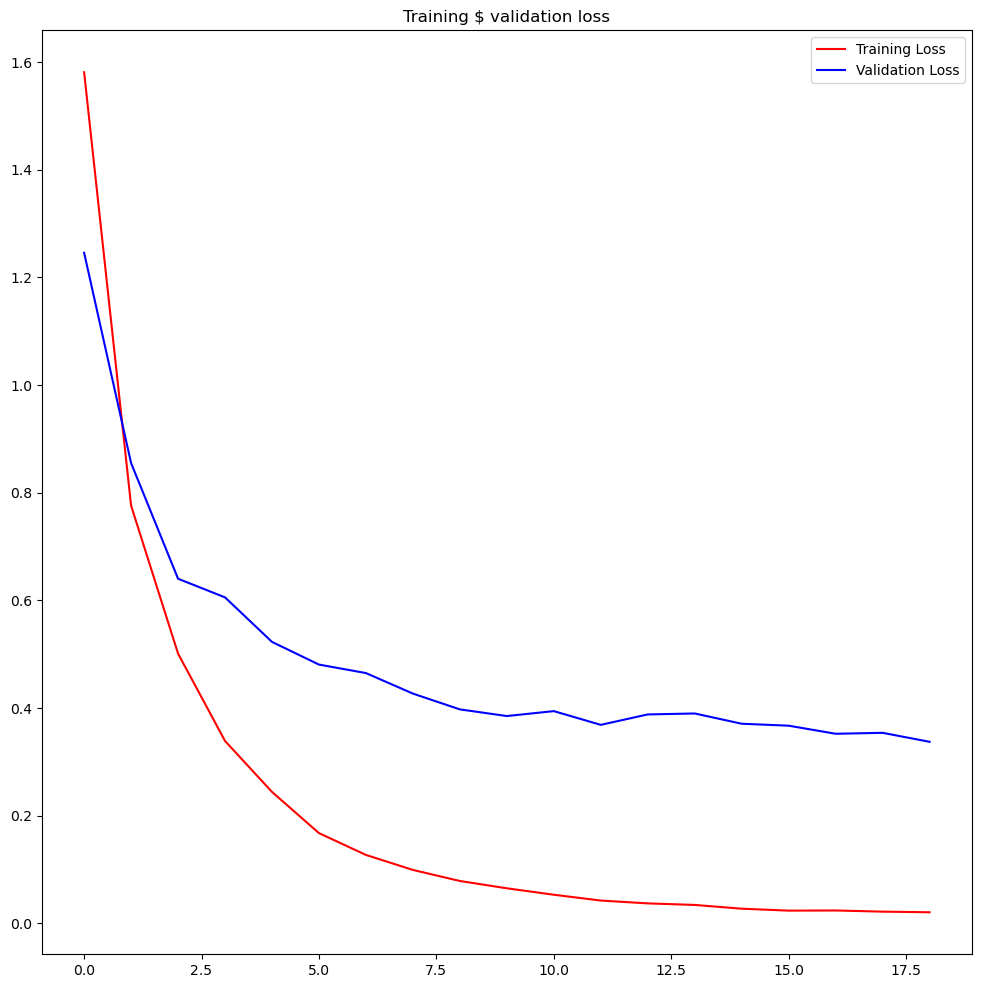

In [16]:
import matplotlib.pyplot as plt

print("metrics of InceptionResnetV2")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

In [20]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions = model.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

33/33 [==============================] - 41s 1s/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.89      0.84      0.86        97
   bacterial_leaf_streak       0.96      0.92      0.94        76
bacterial_panicle_blight       0.82      0.81      0.82        69
                   blast       0.91      0.95      0.93       349
              brown_spot       0.93      0.89      0.91       194
              dead_heart       0.94      0.94      0.94       289
            downy_mildew       0.92      0.83      0.87       124
                   hispa       0.90      0.94      0.92       320
                  normal       0.92      0.94      0.93       354
                  tungro       0.91      0.92      0.92       219

                accuracy                           0.92      2091
               macro avg       0.91      0.90      0.90      2091
            weighted avg       0.92      0.92      0.92      2091



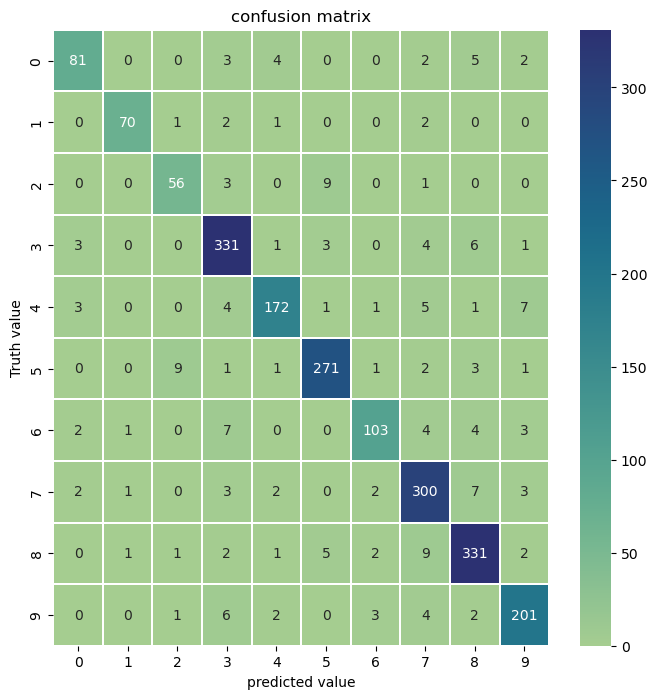

[[ 81   0   0   3   4   0   0   2   5   2]
 [  0  70   1   2   1   0   0   2   0   0]
 [  0   0  56   3   0   9   0   1   0   0]
 [  3   0   0 331   1   3   0   4   6   1]
 [  3   0   0   4 172   1   1   5   1   7]
 [  0   0   9   1   1 271   1   2   3   1]
 [  2   1   0   7   0   0 103   4   4   3]
 [  2   1   0   3   2   0   2 300   7   3]
 [  0   1   1   2   1   5   2   9 331   2]
 [  0   0   1   6   2   0   3   4   2 201]]


In [21]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


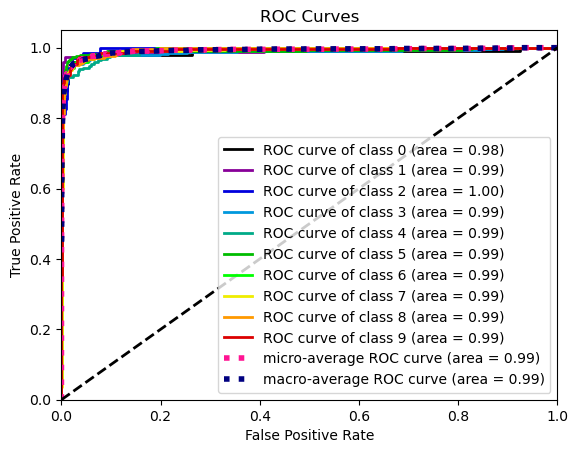

In [22]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()